In [ ]:
from speechsep.imports import *
from speechsep.data import *
from speechsep.core import *
from speechsep.masks import *
from speechsep.utils import *

In [ ]:
class SiameseSpec(Tuple):
    def show(self, ctx=None, **kwargs):
        self[0].show()
        self[1].show()

In [ ]:
class SiamesePiar(Transform):
    def __init__(self, items, labels):
        store_attr(self, 'items,labels')
        self.assoc = self
        sortlbl = sorted(enumerate(labels), key=itemgetter(1))
        self.clsmap = {k:L(v).itemgot(0) for k,v in itertools.groupby(sortlbl, key=itemgetter(1))}
        self.idxs = range_of(self.items)
        
    def encodes(self, i:int)->None:
        othercls=self.clsmap[self.labels[i]] if random.random()>0.5 else self.idxs
        otherit = random.choice(othercls)
        return SiameseSpec(self.items[i], self.items[otherit])

# Real Shit

In [ ]:
items = get_audio_files("../data/SmallDataset/")

In [ ]:
sp = SiamesePiar(items, items.map(parent_label))
maskify = Transform(MaskBinary.create, as_item=True)
pipe = Pipeline([sp, AudioMono.create, Resample(22050), Clip(5), Maskify()])

(None, 5.0secs at 22050 samples per second,
  <speechsep.masks.MaskcIRM at 0x7fcc7749f710>])

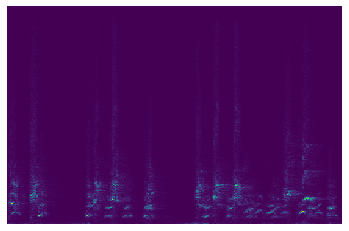

In [ ]:
pipe(0)

[<speechsep.masks.MaskcIRM object at 0x7fcc7477e7d0>, <speechsep.masks.MaskcIRM object at 0x7fcc7477e990>]


(None, 4.992290249433107secs at 22050 samples per second,
 None, 4.992290249433107secs at 22050 samples per second)

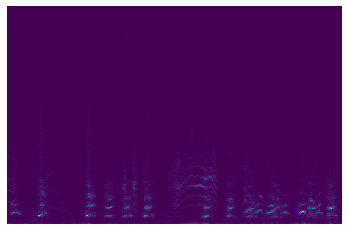

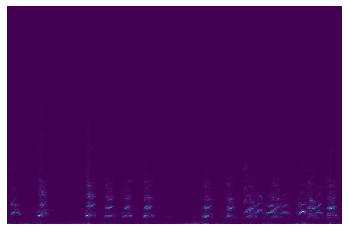

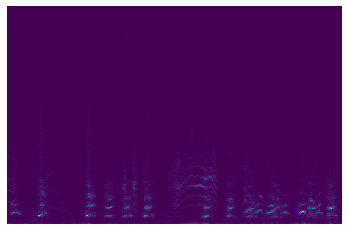

In [ ]:
pipe.decode((pipe(0)[0],pipe(0)[1]))

In [ ]:
a[0]

NameError: name 'a' is not defined

In [ ]:
joined = AudioMono(join_audios(a[0]), a[0][0].sr)

In [ ]:
spec = Spectify()(joined)
b = [spec*m for m in a[1]]

In [ ]:
Spectify().decode(b[0])

In [ ]:
Spectify().decode(b[1])

# testing

In [ ]:
class list2spec(Transform):
    as_item_force=True
    def encodes(self, fn_list)->None:
        return SiameseSpec(fn_list)

In [ ]:
fn = (Path("../data/AudioTest1_full.wav"),Path("../data/AudioTest2.wav"))
pipe = Pipeline([list2spec, AudioMono.create, Resample(22050), Clip(10), Maskify()])

In [ ]:
pipe(fn)